In [1]:
from pathlib import Path
from IPython.display import HTML, display
css = Path("../../../css/rtl.css").read_text(encoding="utf-8")
display(HTML(f"<style>{css}</style>"))


# فصل ۲ — مبانی داده و پیش‌پردازش
## درس ۹: سازوکارهای گمشدگی داده (MCAR، MAR، MNAR) و پیامدهای عملی


### اهداف یادگیری
در پایان این درس، شما قادر خواهید بود:

1. از نمادگذاری رسمی داده‌های گمشده $(Y, R)$ استفاده کنید و سازوکار گمشدگی را به‌صورت توزیع شرطی $p(R\mid Y)$ تفسیر کنید.
2. تفاوت **MCAR**، **MAR** و **MNAR** را هم به‌صورت ریاضی و هم به‌صورت عملی تشخیص دهید.
3. توضیح دهید چرا MCAR اغلب (با ملاحظات مهم) تحلیلِ صرفاً ردیف‌های کامل را توجیه می‌کند، چرا MAR به روش‌های مبتنی بر درست‌نمایی یا برآورد/جایگذاری (imputation) انگیزه می‌دهد، و چرا MNAR نیازمند مدل‌سازی صریح یا تحلیل حساسیت است.
4. ابزارهای تشخیصی عملی بسازید: نقشهٔ گمشدگی، شاخص‌های گمشدگی، و بررسی‌های پیش‌بینانه برای آزمونِ معقول‌بودن MCAR.
5. اثر سازوکارها را بر برآوردها و مدل‌ها با آزمایش‌های کنترل‌شده روی چندین دیتاست جدولی اندازه‌گیری کنید.


---
## ۱) دادهٔ گمشده به‌عنوان یک شیء تصادفی: نمادگذاری و فاکتورگیری

فرض کنید $Y \in \mathbb{R}^{n\times p}$ ماتریس **کامل** داده‌ها باشد که سطرهای آن $i=1,\dots,n$ و ستون‌های آن (ویژگی‌ها) $j=1,\dots,p$ هستند. آن را به بخش مشاهده‌شده و بخش گمشده تفکیک می‌کنیم:
$$
Y = (Y_{\text{obs}},\, Y_{\text{mis}}).
$$

ماتریس **شاخص گمشدگی** را به‌صورت $R \in \{0,1\}^{n\times p}$ تعریف می‌کنیم:
$$
R_{ij} =
\begin{cases}
1, & \text{if } Y_{ij} \text{ is observed},\\
0, & \text{if } Y_{ij} \text{ is missing}.
\end{cases}
$$

یک سازوکار گمشدگی داده به‌صورت یک توزیع شرطی مدل می‌شود:
$$
p(R \mid Y, \psi),
$$
که در آن $\psi$ پارامترهای سازوکار هستند. در حالت کلی، مدل مشترک چنین است:
$$
p(Y, R \mid \theta, \psi) = p(Y \mid \theta)\, p(R \mid Y, \psi).
$$

این فاکتورگیری یک گزارهٔ مدل‌سازی است: ابتدا مشخص می‌کنیم مقادیر داده چگونه تولید می‌شوند و سپس چگونه (با توجه به این مقادیر) گمشدگی رخ می‌دهد.

### الگوها: تک‌نواخت در برابر دلخواه
گمشدگی ممکن است **تک‌نواخت** باشد (مثلاً در داده‌های طولی، ریزش نمونه‌ها) یا **دلخواه** (در داده‌های جدولی عمومی). تمرکز این درس روی سازوکارها (MCAR/MAR/MNAR) است، نه شکل دقیق الگو—چون همین مفاهیم در هر دو حالت صدق می‌کنند.


---
## ۲) تعریف‌های MCAR، MAR، MNAR

### ۲.۱ MCAR — گمشدگی کاملاً تصادفی
یک سازوکار زمانی MCAR است که گمشدگی مستقل از داده باشد:
$$
p(R \mid Y, \psi) = p(R \mid \psi).
$$
به‌صورت معادل، $R \perp\!\!\!\perp Y$. در MCAR، اینکه یک مقدار گم شود هیچ اطلاعاتی دربارهٔ خودش یا سایر متغیرها حمل نمی‌کند.

برداشت عملی: اگر مقادیر به‌دلیل اختلال‌های کاملاً تصادفی (مثلاً قطع لحظه‌ای ثبت‌گر) گم شوند و این اختلال با ویژگی‌های نمونه‌ها هم‌بستگی نداشته باشد، MCAR می‌تواند معقول باشد.

### ۲.۲ MAR — گمشدگی تصادفی (به‌معنای روبین)
یک سازوکار زمانی MAR است که با شرط‌کردن روی بخش مشاهده‌شده، گمشدگی به بخش گمشده وابسته نباشد:
$$
p(R \mid Y, \psi) = p(R \mid Y_{\text{obs}}, \psi).
$$
در این حالت، گمشدگی می‌تواند به متغیرهای **مشاهده‌شده** وابسته باشد، اما به مقادیرِ دیده‌نشده وابسته نیست.

برداشت عملی: ممکن است درآمد در افراد جوان‌تر (سنِ مشاهده‌شده) بیشتر گم شود، اما اگر سن و سایر متغیرهای مشاهده‌شده را بدانیم، احتمال گمشدگیِ درآمد دیگر به خودِ مقدار درآمد وابسته نباشد.

### ۲.۳ MNAR — گمشدگی غیرتصادفی
MNAR زمانی رخ می‌دهد که حتی پس از شرط‌کردن روی آنچه می‌بینیم، گمشدگی به مقادیر دیده‌نشده وابسته باشد:
$$
p(R \mid Y, \psi) \text{ depends on } Y_{\text{mis}}.
$$
برداشت عملی: درآمدهای بسیار بالا عمداً گزارش نمی‌شوند، حتی بعد از کنترل متغیرهای مشاهده‌شده. در این حالت، خودِ گمشدگی دربارهٔ مقدار گمشده اطلاعات می‌دهد.

### هشدار مهم
این تعریف‌ها دربارهٔ **فرآیند تولید داده** هستند، نه صرفاً خودِ دیتاست. با یک دیتاست منفرد نمی‌توان MAR یا MNAR را «اثبات» کرد؛ فقط می‌توان شواهد، تشخیص‌ها و استدلال‌های مبتنی بر دانش حوزه ارائه داد.


---
## ۳) «قابل‌چشم‌پوشی بودن» سازوکار و اینکه چرا سازوکارها برای استنباط مهم‌اند

فرض کنید برای دادهٔ کامل، یک مدل پارامتری $p(Y\mid\theta)$ داریم. اگر داده کامل بود، استنباط درست‌نمایی از
$$
L(\theta; Y) = p(Y\mid\theta)
$$
استفاده می‌کرد.

با گمشدگی، درست‌نماییِ دادهٔ مشاهده‌شده با انتگرال‌گیری روی بخش گمشده به‌دست می‌آید:
$$
p(Y_{\text{obs}}, R \mid \theta, \psi) = \int p(Y\mid\theta)\, p(R\mid Y, \psi)\, dY_{\text{mis}}.
$$

### ۳.۱ چه زمانی می‌توان سازوکار را نادیده گرفت؟
یک نتیجهٔ کلاسیک (روبین) می‌گوید برای استنباطِ مبتنی بر درست‌نمایی، می‌توان سازوکار گمشدگی را «قابل‌چشم‌پوشی» دانست اگر:

1. سازوکار **MAR** باشد، و
2. پارامترها **متمایز** باشند؛ یعنی فضاهای پارامتری $\theta$ و $\psi$ مستقل باشند (هیچ قید مشترکی نداشته باشند).

در این صورت، استنباط دربارهٔ $\theta$ می‌تواند با تکیه بر $p(Y_{\text{obs}}\mid\theta)$ انجام شود، بدون اینکه مجبور باشیم $p(R\mid Y,\psi)$ را صریحاً مدل کنیم.

برداشت شهودی: اگر گمشدگی فقط به چیزهایی وابسته باشد که همین حالا مشاهده کرده‌ایم و پارامترهای سازوکار با پارامترهای مدل داده قید مشترک نداشته باشند، آنگاه فرآیند گمشدگی اطلاعات اضافه‌ای دربارهٔ $\theta$ فراتر از $Y_{\text{obs}}$ وارد نمی‌کند.

### ۳.۲ چرا MNAR دشوار است؟
در MNAR، معمولاً نمی‌توان درست‌نماییِ مشاهده‌شده‌ای نوشت که از مدل گمشدگی مستقل باشد، چون $p(R\mid Y)$ به $Y_{\text{mis}}$ وابسته است. مشکلات شناسایی‌پذیری (identifiability) ظاهر می‌شوند: ترکیب‌های متفاوتی از $p(Y\mid\theta)$ و $p(R\mid Y,\psi)$ می‌توانند همان توزیع مشاهده‌شده را تولید کنند.

به همین دلیل تحلیل MNAR معمولاً به یکی از این‌ها نیاز دارد:
- مدل‌های صریح گمشدگی (selection model، pattern-mixture model)،
- تحلیل حساسیت (تغییر مفروضات و بررسی پایداری)،
- دادهٔ بیرونی یا نمونه‌گیری پیگیری (follow-up).


---
## ۴) پیامدهای عملی: چه چیزهایی ممکن است خراب شود؟

### ۴.۱ تحلیلِ صرفاً ردیف‌های کامل (حذف ردیفی)
حذف سطرهایی که هر مقدار گمشده‌ای دارند، توزیع نمونهٔ مؤثر را تغییر می‌دهد. تحت MCAR، این کار اغلب برای میانگین‌ها و ضرایب رگرسیون بدون بایاس است (ولی واریانس را زیاد می‌کند). تحت MAR/MNAR، می‌تواند بایاس‌دار باشد چون نمونهٔ باقی‌مانده نمایندهٔ جامعه نیست.

### ۴.۲ جایگذاری (Imputation) و آموزش مدل
روش‌های جایگذاری به‌طور ضمنی فرضی دربارهٔ گمشدگی دارند:
- بسیاری از روش‌های رایج تحت MAR (و گاهی MCAR) انگیزه دارند.
- تحت MNAR، جایگذاری ساده می‌تواند توزیع‌ها را به‌شکل سیستماتیک تحریف کند.

### ۴.۳ مهندسی ویژگی با شاخص‌های گمشدگی
در مدل‌های پیش‌بینی، خودِ گمشدگی می‌تواند پیش‌بین باشد (به‌خصوص در MAR/MNAR). افزودن شاخص‌هایی مثل $\mathbb{1}[Y_{ij} \text{ گمشده است}]$ گاهی دقت پیش‌بینی را بالا می‌برد، اما در عین حال فرآیند گمشدگی را وارد مدل می‌کند. برای تفسیر علّی، این موضوع می‌تواند مسئله‌ساز باشد مگر اینکه دقیقاً توجیه شود.

### ۴.۴ خطاهای ارزیابی
اگر سازوکار/الگوی گمشدگی بین آموزش و اجرا (deployment) فرق کند (نوعی تغییر توزیع)، عملکرد می‌تواند شدیداً تغییر کند. الگوی گمشدگی را بخشی از توزیع داده در نظر بگیرید.


In [2]:
import numpy as np
import pandas as pd
from pathlib import Path

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error

np.random.seed(42)


---
## ۵) بارگذاری چند دیتاست از مخزن

در این درس از چند دیتاست (طبقه‌بندی و رگرسیون) استفاده می‌کنیم تا سازوکارهای گمشدگی و پیامدهای آن‌ها را نشان دهیم.

فرض نمی‌کنیم که این دیتاست‌ها حتماً گمشدگی طبیعی داشته باشند. در عوض، برای اینکه تعریف سازوکارها به‌طور دقیق رعایت شود (چون به فرآیند تولید داده مربوط است)، گمشدگی را به‌صورت **کنترل‌شده** با MCAR/MAR/MNAR **تزریق** می‌کنیم.


In [3]:
DATASETS = {
    "diabetes": Path("../../../Datasets/Classification/diabetes.csv"),
    "wine_quality": Path("../../../Datasets/Classification/Wine_Quality.csv"),
    "house_prices": Path("../../../Datasets/Regression/house-prices.csv"),
    "listings": Path("../../../Datasets/Regression/listings.csv"),
}

def load_csv(path: Path, **kwargs) -> pd.DataFrame:
    return pd.read_csv(path, **kwargs)

df_diabetes = load_csv(DATASETS["diabetes"])
df_wine = load_csv(DATASETS["wine_quality"])
df_house = load_csv(DATASETS["house_prices"])
df_listings = load_csv(DATASETS["listings"])

print("diabetes:", df_diabetes.shape)
print("wine_quality:", df_wine.shape)
print("house_prices:", df_house.shape)
print("listings:", df_listings.shape)

display(df_diabetes.head())
display(df_wine.head())
display(df_house.head())
display(df_listings.head())


diabetes: (768, 9)
wine_quality: (4898, 12)
house_prices: (128, 8)
listings: (94559, 18)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,classification
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,Non-Diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,Non-Diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56861,-0.11270,Private room,57.0,1,51,2025-02-09,0.29,3,344,10,NaN
1,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,NaN,Kensington and Chelsea,51.48780,-0.16813,Entire home/apt,NaN,4,96,2024-04-28,0.52,1,11,2,NaN
2,17402,Very Central Modern 3-Bed/2 Bath By Oxford St W1,67564,Liz,NaN,Westminster,51.52195,-0.14094,Entire home/apt,510.0,3,56,2024-02-19,0.33,5,293,0,NaN
3,24328,Battersea live/work artist house,41759,Joe,NaN,Wandsworth,51.47072,-0.16266,Entire home/apt,213.0,90,94,2022-07-19,0.54,1,194,0,NaN
4,31036,Bright compact 1 Bedroom Apartment Brick Lane,133271,Hendryks,NaN,Tower Hamlets,51.52425,-0.06997,Entire home/apt,100.0,2,126,2025-02-20,0.70,8,353,3,NaN


---
## ۶) تشخیص‌ها: دیدن و کمی‌سازی گمشدگی

قدم اول این است که ببینیم مقادیر **کجا** گم شده‌اند. یک روش ساده در نوت‌بوک، ترسیم نقشهٔ حرارتیِ $R$ (شاخص مشاهده/گمشدگی) است.

برای یک دیتافریم $X$ تعریف کنید:
$$
R(X) = \mathbb{1}[X \text{ is not null}].
$$
اگر بلوک‌ها یا نوارهای ساختاریافته ببینید، احتمالاً گمشدگی به متغیرها، زمان، گروه‌ها یا فرآیند جمع‌آوری داده مرتبط است.

در ادامه ابزارهایی می‌سازیم که:
- نرخ‌های گمشدگی را محاسبه می‌کنند،
- شاخص‌های گمشدگی می‌سازند،
- نقشهٔ گمشدگی را رسم می‌کنند.


In [4]:
def missingness_summary(df: pd.DataFrame) -> pd.DataFrame:
    s = df.isna().mean().sort_values(ascending=False)
    return pd.DataFrame({
        "missing_rate": s,
        "missing_count": (df.isna().sum()).loc[s.index],
        "dtype": df.dtypes.loc[s.index].astype(str),
    })

def plot_missingness_map(df: pd.DataFrame, max_cols: int = 30, title: str = ""):
    cols = list(df.columns)[:max_cols]
    R = (~df[cols].isna()).astype(int).to_numpy()
    plt.figure(figsize=(min(14, 0.35*len(cols)+4), 5))
    plt.imshow(R, aspect="auto")
    plt.yticks([])
    plt.xticks(range(len(cols)), cols, rotation=90)
    plt.title(title or "نقشهٔ گمشدگی (۱=مشاهده‌شده، ۰=گمشده)")
    plt.tight_layout()
    plt.show()

display(missingness_summary(df_diabetes).head(10))
display(missingness_summary(df_wine).head(10))
display(missingness_summary(df_house).head(10))
display(missingness_summary(df_listings).head(10))


,missing_rate,missing_count,dtype
Pregnancies,0.0,0,int64
Glucose,0.0,0,int64
BloodPressure,0.0,0,int64
SkinThickness,0.0,0,int64
Insulin,0.0,0,int64
BMI,0.0,0,float64
DiabetesPedigreeFunction,0.0,0,float64
Age,0.0,0,int64
classification,0.0,0,object


,missing_rate,missing_count,dtype
fixed acidity,0.0,0,float64
volatile acidity,0.0,0,float64
citric acid,0.0,0,float64
residual sugar,0.0,0,float64
chlorides,0.0,0,float64
free sulfur dioxide,0.0,0,float64
total sulfur dioxide,0.0,0,float64
density,0.0,0,float64
pH,0.0,0,float64
sulphates,0.0,0,float64


,missing_rate,missing_count,dtype
Home,0.0,0,int64
Price,0.0,0,int64
SqFt,0.0,0,int64
Bedrooms,0.0,0,int64
Bathrooms,0.0,0,int64
Offers,0.0,0,int64
Brick,0.0,0,object
Neighborhood,0.0,0,object


,missing_rate,missing_count,dtype
license,1.000000,94559,float64
neighbourhood_group,1.000000,94559,float64
price,0.361869,34218,float64
reviews_per_month,0.256369,24242,float64
last_review,0.256369,24242,object
host_name,0.000560,53,object
name,0.000000,0,object
id,0.000000,0,int64
neighbourhood,0.000000,0,object
host_id,0.000000,0,int64


---
## ۷) تزریق گمشدگی بر اساس سازوکار

برای مطالعهٔ سازوکارها، در یک ستون عددی $X$ سه نوع گمشدگی ایجاد می‌کنیم:

1. **MCAR:** انتخاب یکنواخت تصادفی.
2. **MAR:** احتمال گمشدگی تابع یک متغیر مشاهده‌شده $Z$ است.
3. **MNAR:** احتمال گمشدگی تابع خودِ مقدار $X$ است.

این‌ها را طوری پیاده‌سازی می‌کنیم که وابستگی‌ها شفاف باشند.

### مدل لاجستیک برای گمشدگی (پارامتردهی مناسب)
برای MAR یا MNAR معمولاً یک مدل لاجستیک برای شاخص گمشدگی $M = \mathbb{1}[X \text{ is missing}]$ به‌کار می‌رود:
$$
\mathbb{P}(M=1 \mid \cdot) = \sigma(\alpha + \beta\, g(\cdot)),
$$
که $\sigma(t) = \frac{1}{1+e^{-t}}$ است و احتمال را در بازهٔ $(0,1)$ نگه می‌دارد. پارامترهای $(\alpha,\beta)$ را طوری تنظیم می‌کنیم که نرخ کلی گمشدگی نزدیک به مقدار هدف باشد.


In [16]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def inject_mcar(df: pd.DataFrame, col: str, missing_rate: float, rng=np.random.default_rng(0)) -> pd.DataFrame:
    out = df.copy()
    mask = rng.uniform(size=len(out)) < missing_rate
    out.loc[mask, col] = np.nan
    return out

def tune_alpha_for_target(p_raw: np.ndarray, target: float) -> float:
    lo, hi = -20.0, 20.0
    for _ in range(80):
        mid = (lo + hi) / 2
        m = sigmoid(mid + p_raw).mean()
        if m < target:
            lo = mid
        else:
            hi = mid
    return (lo + hi) / 2

def inject_mar(df: pd.DataFrame, col: str, driver_col: str, missing_rate: float, beta: float = 1.0,
               rng=np.random.default_rng(1)) -> pd.DataFrame:
    out = df.copy()
    z = out[driver_col].astype(float).to_numpy()
    z = (z - np.nanmean(z)) / (np.nanstd(z) + 1e-12)
    score = beta * z
    alpha = tune_alpha_for_target(score, missing_rate)
    p = sigmoid(alpha + score)
    mask = rng.uniform(size=len(out)) < p
    out.loc[mask, col] = np.nan
    return out, p

def inject_mnar(df: pd.DataFrame, col: str, missing_rate: float, beta: float = 1.0,
                rng=np.random.default_rng(2)) -> pd.DataFrame:
    out = df.copy()
    x = out[col].astype(float).to_numpy()
    x = (x - np.nanmean(x)) / (np.nanstd(x) + 1e-12)
    score = beta * x
    alpha = tune_alpha_for_target(score, missing_rate)
    p = sigmoid(alpha + score)
    mask = rng.uniform(size=len(out)) < p
    out.loc[mask, col] = np.nan
    return out, p


---
## ۸) یک چک‌پوینت نظری: بی‌بایاس بودن میانگینِ نمونه تحت MCAR

یک متغیر اسکالر $X$ را با نمونه‌های مستقل $X_1,\dots,X_n$ و شاخص‌های مشاهده $R_i \in \{0,1\}$ در نظر بگیرید که $R_i=1$ یعنی مشاهده شده است.

**میانگین ردیف‌های کامل**:
$$
\bar X_{\text{cc}} = \frac{\sum_{i=1}^n R_i X_i}{\sum_{i=1}^n R_i}.
$$

### قضیه (غیررسمی)
اگر گمشدگی MCAR باشد و $\mathbb{P}(R_i=1)>0$، آنگاه $\bar X_{\text{cc}}$ (به‌طور شرطی نسبت به تعداد مشاهده‌ها) برآوردی بی‌بایاس برای $\mathbb{E}[X]$ است.

### ایدهٔ اثبات
در MCAR، $R_i$ از $X_i$ مستقل است. اگر روی $S=\sum_i R_i$ و روی مجموعهٔ اندیس‌های مشاهده‌شده شرط کنیم، آن مجموعه یک زیرمجموعهٔ تصادفی مستقل از مقادیر $X_i$ است؛ پس امیدریاضی میانگینِ آن زیرمجموعه برابر $\mathbb{E}[X]$ می‌شود.

نکتهٔ مهم: حتی اگر بی‌بایاس باشد، واریانس افزایش می‌یابد چون معمولاً $S<n$ است.

این موضوع را با شبیه‌سازی بررسی می‌کنیم.


In [6]:
def monte_carlo_mean_bias(x: np.ndarray, missing_rate: float, trials: int = 2000) -> pd.DataFrame:
    rng = np.random.default_rng(123)
    true_mean = float(np.mean(x))
    est = []
    for _ in range(trials):
        r = (rng.uniform(size=len(x)) >= missing_rate).astype(int)
        if r.sum() == 0:
            continue
        est.append((r * x).sum() / r.sum())
    est = np.array(est)
    return pd.DataFrame({
        "true_mean": [true_mean],
        "mean_estimate": [float(est.mean())],
        "bias": [float(est.mean() - true_mean)],
        "std_estimate": [float(est.std(ddof=1))],
        "trials_used": [len(est)],
    })

x = df_diabetes["BMI"].astype(float).to_numpy()
display(monte_carlo_mean_bias(x, missing_rate=0.3, trials=3000))


,true_mean,mean_estimate,bias,std_estimate,trials_used
0,31.992578,31.987234,-0.005344,0.189302,3000


---
## ۹) دیتاست دیابت: MCAR در برابر MAR در برابر MNAR و اثر بر مدل

در این بخش از دیتاست دیابت (برچسب دودویی) استفاده می‌کنیم تا نشان دهیم یک نرخ گمشدگی یکسان می‌تواند بسته به سازوکار، پیامدهای کاملاً متفاوتی ایجاد کند.

### برنامه
1. یک ویژگی (مثلاً BMI) را خراب می‌کنیم.
2. سه نسخه می‌سازیم: MCAR، MAR (وابسته به Glucose)، MNAR (وابسته به خود BMI).
3. مقایسه می‌کنیم:
   - تغییر توزیع BMI در سطرهای مشاهده‌شده،
   - بایاس میانگین BMI،
   - عملکرد مدل پیش‌بینی تحت راهبردهای مختلف:
     - حذف ردیف‌های دارای BMI گمشده (complete-case),
     - جایگذاری میانگین (mean imputation),
     - افزودن شاخص گمشدگی.

اگرچه جایگذاری به‌طور عمیق‌تر در درس ۱۰ بررسی می‌شود، اینجا از روش‌های ساده استفاده می‌کنیم تا اثر *سازوکار* را جدا کنیم.


نرخ‌های گمشدگی:
MCAR: 0.3151041666666667
MAR : 0.3489583333333333
MNAR: 0.3645833333333333


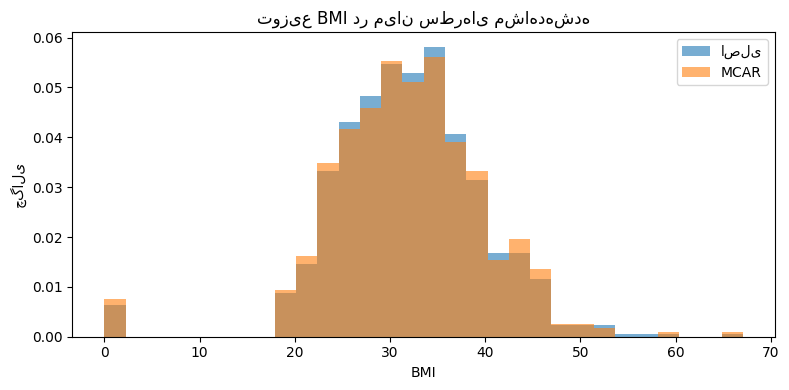

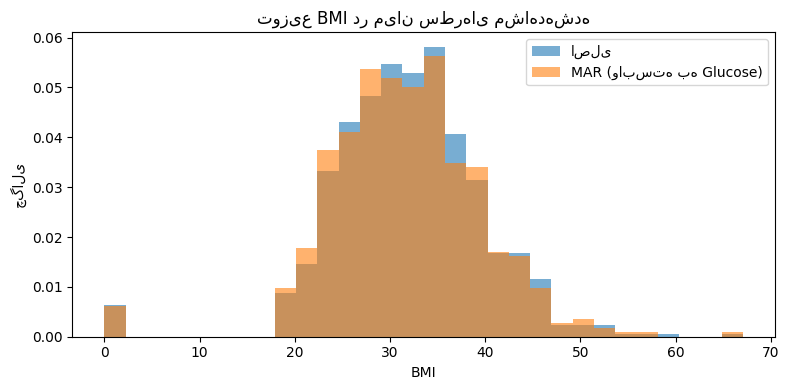

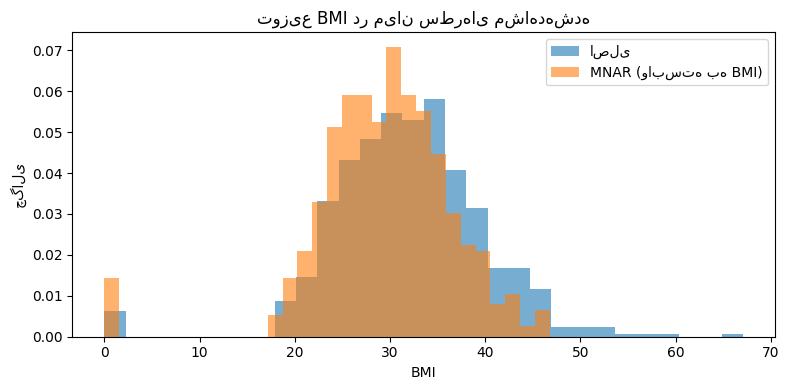

In [7]:
df0 = df_diabetes.copy()

target_missing = 0.35
df_mcar = inject_mcar(df0, col="BMI", missing_rate=target_missing)

df_mar, p_mar = inject_mar(df0, col="BMI", driver_col="Glucose", missing_rate=target_missing, beta=1.2)
df_mnar, p_mnar = inject_mnar(df0, col="BMI", missing_rate=target_missing, beta=1.2)

def compare_bmi_distributions(df_a, df_b, label_a="A", label_b="B"):
    a = df_a["BMI"].dropna().astype(float).to_numpy()
    b = df_b["BMI"].dropna().astype(float).to_numpy()
    plt.figure(figsize=(8,4))
    plt.hist(a, bins=30, alpha=0.6, label=label_a, density=True)
    plt.hist(b, bins=30, alpha=0.6, label=label_b, density=True)
    plt.title("توزیع BMI در میان سطرهای مشاهده‌شده")
    plt.xlabel("BMI")
    plt.ylabel("چگالی")
    plt.legend()
    plt.tight_layout()
    plt.show()

print("نرخ‌های گمشدگی:")
print("MCAR:", df_mcar["BMI"].isna().mean())
print("MAR :", df_mar["BMI"].isna().mean())
print("MNAR:", df_mnar["BMI"].isna().mean())

compare_bmi_distributions(df0, df_mcar, "اصلی", "MCAR")
compare_bmi_distributions(df0, df_mar, "اصلی", "MAR (وابسته به Glucose)")
compare_bmi_distributions(df0, df_mnar, "اصلی", "MNAR (وابسته به BMI)")


In [8]:
def bmi_mean_report(df, name):
    true_mean = float(df0["BMI"].astype(float).mean())
    cc_mean = float(df["BMI"].astype(float).dropna().mean())
    return {"dataset": name, "true_mean": true_mean, "complete_case_mean": cc_mean, "difference": cc_mean-true_mean}

report = pd.DataFrame([
    bmi_mean_report(df_mcar, "MCAR"),
    bmi_mean_report(df_mar, "MAR"),
    bmi_mean_report(df_mnar, "MNAR"),
])
display(report)


,dataset,true_mean,complete_case_mean,difference
0,MCAR,31.992578,31.906274,-0.086304
1,MAR,31.992578,31.761400,-0.231178
2,MNAR,31.992578,29.476025,-2.516554


### تفسیر
- در **MCAR**، توزیع و میانگین BMI در سطرهای مشاهده‌شده باید نزدیک به حالت اصلی بماند (تا حد نویز نمونه‌گیری).
- در **MAR**، اگر BMI با متغیر محرک (Glucose) هم‌بسته باشد، توزیع BMIِ مشاهده‌شده می‌تواند جابه‌جا شود و خلاصه‌های complete-case را بایاس‌دار کند.
- در **MNAR**، چون گمشدگی به خود BMI وابسته است، توزیع مشاهده‌شده معمولاً به‌طور سیستماتیک تحریف می‌شود.

اکنون اثر این موضوع را بر عملکرد مدل پیش‌بینی برچسب دیابت اندازه‌گیری می‌کنیم.


In [9]:
def prepare_xy(df: pd.DataFrame):
    y = df["classification"].astype(str)
    X = df.drop(columns=["classification"]).copy()
    return X, y

def evaluate_strategies(df: pd.DataFrame, title: str):
    X, y = prepare_xy(df)

    num_cols = [c for c in X.columns if pd.api.types.is_numeric_dtype(X[c])]
    cat_cols = [c for c in X.columns if c not in num_cols]

    # راهبرد A: حذف ردیف‌های کامل
    mask = ~X.isna().any(axis=1)
    X_cc = X.loc[mask].copy()
    y_cc = y.loc[mask].copy()

    X_train, X_test, y_train, y_test = train_test_split(X_cc, y_cc, test_size=0.25, random_state=42, stratify=y_cc)

    pre_cc = ColumnTransformer(
        transformers=[
            ("num", "passthrough", num_cols),
            ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ],
        remainder="drop",
    )
    clf_cc = Pipeline([
        ("pre", pre_cc),
        ("clf", LogisticRegression(max_iter=2000)),
    ])
    clf_cc.fit(X_train, y_train)
    proba = clf_cc.predict_proba(X_test)[:, 1]
    yhat = clf_cc.predict(X_test)

    # راهبرد B: جایگذاری ساده (بدون شاخص گمشدگی)
    pre_imp = ColumnTransformer(
        transformers=[
            ("num", Pipeline([("imp", SimpleImputer(strategy="mean"))]), num_cols),
            ("cat", Pipeline([("imp", SimpleImputer(strategy="most_frequent")),
                             ("oh", OneHotEncoder(handle_unknown="ignore"))]), cat_cols),
        ],
        remainder="drop",
    )
    clf_imp = Pipeline([("pre", pre_imp), ("clf", LogisticRegression(max_iter=2000))])
    X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
    clf_imp.fit(X_train2, y_train2)
    proba2 = clf_imp.predict_proba(X_test2)[:, 1]
    yhat2 = clf_imp.predict(X_test2)

    # راهبرد C: جایگذاری + شاخص گمشدگی برای عددی‌ها
    pre_ind = ColumnTransformer(
        transformers=[
            ("num", Pipeline([("imp", SimpleImputer(strategy="mean", add_indicator=True))]), num_cols),
            ("cat", Pipeline([("imp", SimpleImputer(strategy="most_frequent")),
                             ("oh", OneHotEncoder(handle_unknown="ignore"))]), cat_cols),
        ],
        remainder="drop",
    )
    clf_ind = Pipeline([("pre", pre_ind), ("clf", LogisticRegression(max_iter=2000))])
    X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
    clf_ind.fit(X_train3, y_train3)
    proba3 = clf_ind.predict_proba(X_test3)[:, 1]
    yhat3 = clf_ind.predict(X_test3)

    def safe_auc(y_true, p, pos_label="Diabetic"):
        y01 = (y_true == pos_label).astype(int)
        return roc_auc_score(y01, p)

    results = pd.DataFrame([
        {"strategy": "complete_case_dropna", "n_train": len(X_train), "accuracy": accuracy_score(y_test, yhat),
         "roc_auc": safe_auc(y_test, proba)},
        {"strategy": "simple_impute", "n_train": len(X_train2), "accuracy": accuracy_score(y_test2, yhat2),
         "roc_auc": safe_auc(y_test2, proba2)},
        {"strategy": "impute_plus_missing_indicator", "n_train": len(X_train3), "accuracy": accuracy_score(y_test3, yhat3),
         "roc_auc": safe_auc(y_test3, proba3)},
    ])
    print(title)
    display(results)

evaluate_strategies(df_mcar, "دیابت — BMI با MCAR خراب شده است")
evaluate_strategies(df_mar,  "دیابت — BMI با MAR (وابسته به Glucose) خراب شده است")
evaluate_strategies(df_mnar, "دیابت — BMI با MNAR (وابسته به BMI) خراب شده است")


دیابت — BMI با MCAR خراب شده است


,strategy,n_train,accuracy,roc_auc
0,complete_case_dropna,394,0.772727,0.137260
1,simple_impute,576,0.786458,0.167045
2,impute_plus_missing_indicator,576,0.786458,0.168358


دیابت — BMI با MAR (وابسته به Glucose) خراب شده است


,strategy,n_train,accuracy,roc_auc
0,complete_case_dropna,375,0.824000,0.176548
1,simple_impute,576,0.760417,0.191284
2,impute_plus_missing_indicator,576,0.760417,0.192955


دیابت — BMI با MNAR (وابسته به BMI) خراب شده است


,strategy,n_train,accuracy,roc_auc
0,complete_case_dropna,366,0.803279,0.110465
1,simple_impute,576,0.791667,0.183045
2,impute_plus_missing_indicator,576,0.770833,0.173254


---
## ۱۰) بررسی معقول‌بودن MCAR با مدل‌کردن شاخص گمشدگی

ایدهٔ تشخیصی رایج:

1. متغیر $X$ با گمشدگی را انتخاب کنید.
2. $M = \mathbb{1}[X \text{ is missing}]$ را بسازید.
3. مدلی مانند $\widehat{M} = f(Z)$ را از سایر متغیرهای مشاهده‌شده $Z$ یاد بگیرید.
4. اگر $M$ به‌شدت از $Z$ قابل پیش‌بینی باشد، MCAR بعید است.

این کار MAR یا MNAR را اثبات نمی‌کند؛ فقط نشان می‌دهد «رفتارِ MCAR» محتمل نیست. تحت MAR، قابل پیش‌بینی بودن گمشدگی از متغیرهای مشاهده‌شده کاملاً مجاز است.

در ادامه یک تشخیص ساده با رگرسیون لجستیک پیاده‌سازی می‌کنیم.


In [10]:
from sklearn.metrics import roc_auc_score

def missingness_predictability(df: pd.DataFrame, missing_col: str, drop_cols=None):
    if drop_cols is None:
        drop_cols = []
    X = df.drop(columns=[missing_col] + drop_cols).copy()
    M = df[missing_col].isna().astype(int)

    mask = ~X.isna().any(axis=1)
    X = X.loc[mask]
    M = M.loc[mask]

    num_cols = [c for c in X.columns if pd.api.types.is_numeric_dtype(X[c])]
    cat_cols = [c for c in X.columns if c not in num_cols]

    pre = ColumnTransformer(
        transformers=[
            ("num", Pipeline([("imp", SimpleImputer(strategy="mean"))]), num_cols),
            ("cat", Pipeline([("imp", SimpleImputer(strategy="most_frequent")),
                             ("oh", OneHotEncoder(handle_unknown="ignore"))]), cat_cols),
        ],
        remainder="drop",
    )
    model = Pipeline([("pre", pre), ("clf", LogisticRegression(max_iter=2000))])

    X_train, X_test, y_train, y_test = train_test_split(X, M, test_size=0.3, random_state=42, stratify=M)
    model.fit(X_train, y_train)
    p = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, p)
    return auc, int(M.sum()), len(M)

for name, dfx in [("MCAR", df_mcar), ("MAR", df_mar), ("MNAR", df_mnar)]:
    auc, miss, n = missingness_predictability(dfx, missing_col="BMI", drop_cols=["classification"])
    print(f"{name}: تعداد BMI گمشده={miss}/{n} |  AUC پیش‌بینی گمشدگی از سایر ویژگی‌ها = {auc:.3f}")


MCAR: تعداد BMI گمشده=242/768 |  AUC پیش‌بینی گمشدگی از سایر ویژگی‌ها = 0.457
MAR: تعداد BMI گمشده=268/768 |  AUC پیش‌بینی گمشدگی از سایر ویژگی‌ها = 0.769
MNAR: تعداد BMI گمشده=280/768 |  AUC پیش‌بینی گمشدگی از سایر ویژگی‌ها = 0.563


### تفسیر این تشخیص
- AUC نزدیک ۰٫۵ یعنی گمشدگی از روی ویژگی‌های مشاهده‌شده به‌سختی قابل پیش‌بینی است (سازگار با MCAR، اما قطعی نیست).
- AUC به‌طور معنی‌دار بالاتر از ۰٫۵ یعنی گمشدگی به متغیرهای مشاهده‌شده وابسته است (ناسازگار با MCAR؛ سازگار با MAR یا MNAR).

در MNAR هم ممکن است چنین قابل‌پیش‌بینی بودنی رخ دهد، چون متغیر گمشده می‌تواند با متغیرهای مشاهده‌شده هم‌بسته باشد. با دادهٔ مشاهده‌شده تنها نمی‌توان MNAR را رد یا تأیید کرد.


---
## ۱۱) دیتاست کیفیت شراب: MAR می‌تواند خلاصه‌ها را بایاس‌دار کند حتی بدون وابستگی مستقیم به متغیر گمشده

اکنون از دیتاست دیگری استفاده می‌کنیم تا نشان دهیم MAR می‌تواند خلاصه‌های complete-case را بایاس‌دار کند، اگر متغیر گمشده با محرک‌های مشاهده‌شده هم‌بسته باشد.

کارها:
- گمشدگی را در `residual sugar` تزریق می‌کنیم،
- آن را به `alcohol` (مشاهده‌شده) وابسته می‌کنیم تا MAR بسازیم،
- جابه‌جایی توزیع را در سطرهای مشاهده‌شده بررسی می‌کنیم.


نرخ گمشدگی: 0.30073499387505104


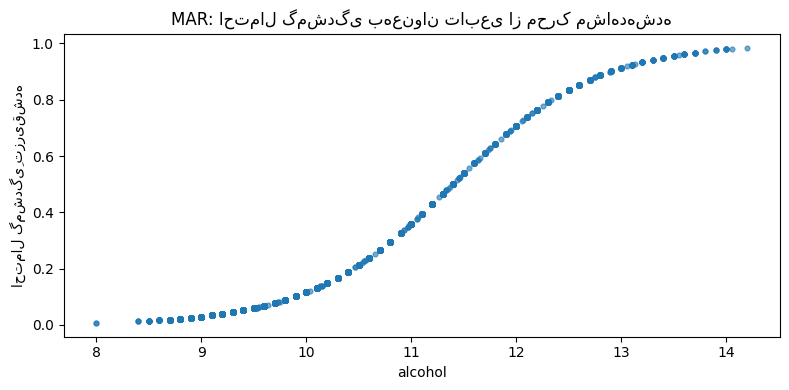

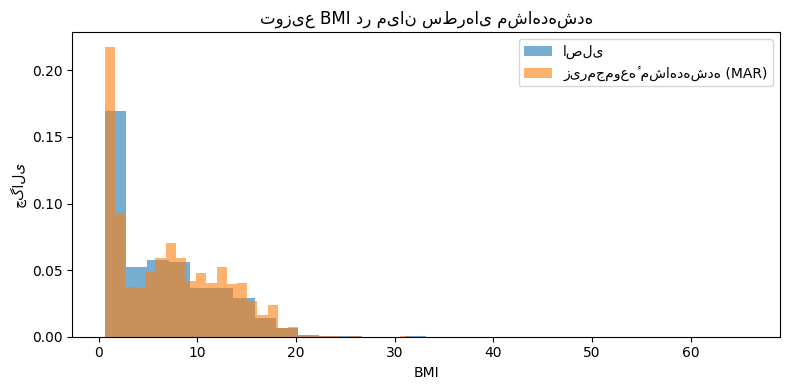

میانگین واقعی: 6.391414863209474
میانگین complete-case پس از MAR: 7.184262773722628
اختلاف: 0.7928479105131538


In [11]:
dfw0 = df_wine.copy()

col_x = "residual sugar"
driver = "alcohol"

target_missing = 0.30
dfw_mar, p_wmar = inject_mar(dfw0, col=col_x, driver_col=driver, missing_rate=target_missing, beta=1.8)

print("نرخ گمشدگی:", dfw_mar[col_x].isna().mean())

plt.figure(figsize=(8,4))
plt.scatter(dfw0[driver].to_numpy(), p_wmar, s=12, alpha=0.6)
plt.xlabel(driver)
plt.ylabel("احتمال گمشدگیِ تزریق‌شده")
plt.title("MAR: احتمال گمشدگی به‌عنوان تابعی از محرک مشاهده‌شده")
plt.tight_layout()
plt.show()

compare_bmi_distributions(
    dfw0.rename(columns={col_x:"BMI"}),
    dfw_mar.rename(columns={col_x:"BMI"}),
    "اصلی", "زیرمجموعهٔ مشاهده‌شده (MAR)"
)

true_mean = float(dfw0[col_x].mean())
cc_mean = float(dfw_mar[col_x].dropna().mean())
print("میانگین واقعی:", true_mean)
print("میانگین complete-case پس از MAR:", cc_mean)
print("اختلاف:", cc_mean - true_mean)


---
## ۱۲) نمایش MNAR با سازوکار انتخابی: چرا از روی دادهٔ مشاهده‌شده ذاتاً قابل آزمون قطعی نیست؟

برای نمایش MNAR، گمشدگی را طوری تزریق می‌کنیم که مستقیم به خودِ مقدار وابسته باشد. مثلاً فرض کنید اجاره‌های گران‌تر احتمال بیشتری دارند که قیمت‌شان ثبت نشده باشد (در برخی داده‌های خزیده‌شده چنین الگوهایی رخ می‌دهد).

مراحل:
- یک ویژگی عددی از دیتاست listings انتخاب می‌کنیم،
- گمشدگی MNAR را با احتمال بیشتر برای مقادیر بزرگ تزریق می‌کنیم،
- نشان می‌دهیم توزیع مشاهده‌شده چگونه «بُرش‌خورده» و تحریف می‌شود.

حتی اگر تشخیص دهیم گمشدگی با ویژگی‌های مشاهده‌شده هم‌بسته است، باز هم نمی‌توانیم وابستگی به مقدار گمشده را پس از شرط‌کردن تأیید کنیم، چون همان مقادیر دیده نمی‌شوند.


نرخ گمشدگی MNAR: 0.359


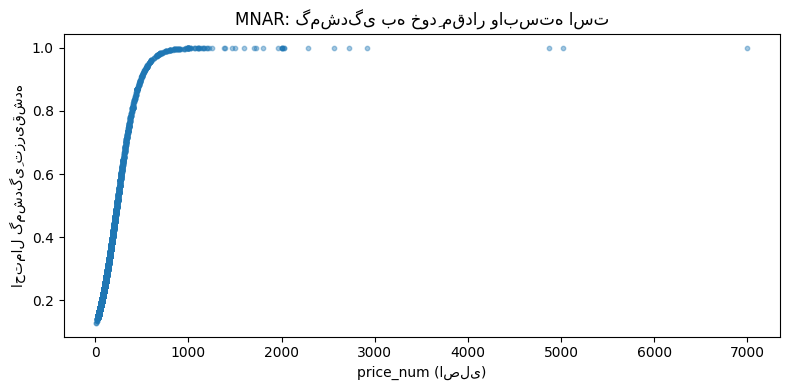

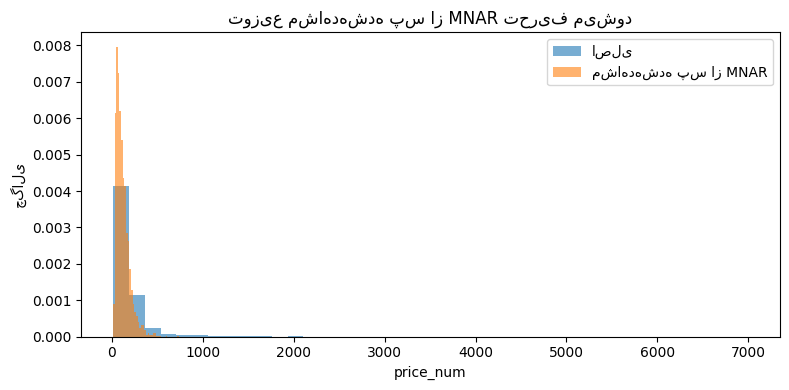

میانگین اصلی: 171.0238
میانگین مشاهده‌شده پس از MNAR: 115.80842433697347


In [12]:
dfl0 = df_listings.copy()

if "price" in dfl0.columns:
    dfl0["price_num"] = pd.to_numeric(dfl0["price"], errors="coerce")
else:
    dfl0["price_num"] = pd.to_numeric(dfl0.get("availability_365"), errors="coerce")

base = dfl0.dropna(subset=["price_num"]).copy()
base = base.sample(n=min(len(base), 5000), random_state=42)

target_missing = 0.35
df_mnar_listings, p_mnar_list = inject_mnar(base, col="price_num", missing_rate=target_missing, beta=2.0)

print("نرخ گمشدگی MNAR:", df_mnar_listings["price_num"].isna().mean())

plt.figure(figsize=(8,4))
plt.scatter(base["price_num"].to_numpy(), p_mnar_list, s=10, alpha=0.4)
plt.xlabel("price_num (اصلی)")
plt.ylabel("احتمال گمشدگیِ تزریق‌شده")
plt.title("MNAR: گمشدگی به خودِ مقدار وابسته است")
plt.tight_layout()
plt.show()

a = base["price_num"].to_numpy()
b = df_mnar_listings["price_num"].dropna().to_numpy()

plt.figure(figsize=(8,4))
plt.hist(a, bins=40, alpha=0.6, density=True, label="اصلی")
plt.hist(b, bins=40, alpha=0.6, density=True, label="مشاهده‌شده پس از MNAR")
plt.xlabel("price_num")
plt.ylabel("چگالی")
plt.title("توزیع مشاهده‌شده پس از MNAR تحریف می‌شود")
plt.legend()
plt.tight_layout()
plt.show()

print("میانگین اصلی:", float(np.mean(a)))
print("میانگین مشاهده‌شده پس از MNAR:", float(np.mean(b)))


---
## ۱۳) پیامدها برای رگرسیون: یک مثال تحلیلی حداقلی

مدل رگرسیون خطی را در نظر بگیرید:
$$
Y = \beta_0 + \beta_1 X + \varepsilon, \quad \mathbb{E}[\varepsilon\mid X]=0.
$$

فرض کنید $Y$ گاهی گم می‌شود.

- تحت **MCAR**، برآوردِ complete-case برای $(\beta_0,\beta_1)$ بی‌بایاس می‌ماند (اما کارایی کمتر می‌شود).
- تحت **MAR**، اگر گمشدگی به $X$ (مشاهده‌شده) وابسته باشد، برآوردِ complete-case می‌تواند بایاس‌دار شود چون توزیع شرطی $X$ در میان نمونه‌های باقی‌مانده تغییر می‌کند.
- تحت **MNAR**، اگر گمشدگی به خودِ $Y$ وابسته باشد (مثلاً مقادیر بزرگ‌تر بیشتر گم شوند)، برآوردِ complete-case معمولاً بایاس‌دار می‌شود حتی اگر $X$ کامل باشد.

این موضوع را با یک شبیه‌سازی ساده نشان می‌دهیم که در آن سازوکار گمشدگیِ $Y$ را کنترل می‌کنیم.


In [13]:
rng = np.random.default_rng(7)

n = 2000
X = rng.normal(size=n)
eps = rng.normal(scale=1.0, size=n)
Y = 1.0 + 2.0 * X + eps

df_syn = pd.DataFrame({"X": X, "Y": Y})

dfY_mcar = inject_mcar(df_syn, "Y", missing_rate=0.3, rng=rng)

dfY_mar, _ = inject_mar(df_syn, col="Y", driver_col="X", missing_rate=0.3, beta=1.5, rng=rng)
dfY_mnar, _ = inject_mnar(df_syn, col="Y", missing_rate=0.3, beta=1.5, rng=rng)

def fit_slope_complete_case(df):
    d = df.dropna(subset=["Y"]).copy()
    reg = LinearRegression().fit(d[["X"]], d["Y"])
    return float(reg.intercept_), float(reg.coef_[0]), len(d)

true_beta0, true_beta1 = 1.0, 2.0
rows = []
for name, d in [("MCAR", dfY_mcar), ("MAR (وابسته به X)", dfY_mar), ("MNAR (وابسته به Y)", dfY_mnar)]:
    b0, b1, m = fit_slope_complete_case(d)
    rows.append({"mechanism": name, "n_observed": m, "beta0_hat": b0, "beta1_hat": b1,
                 "beta0_error": b0-true_beta0, "beta1_error": b1-true_beta1})
display(pd.DataFrame(rows))


,mechanism,n_observed,beta0_hat,beta1_hat,beta0_error,beta1_error
0,MCAR,1359,0.993875,1.995698,-0.006125,-0.004302
1,MAR (وابسته به X),1406,1.008837,1.992837,0.008837,-0.007163
2,MNAR (وابسته به Y),1416,0.843038,1.920892,-0.156962,-0.079108


---
## ۱۴) از روی دادهٔ مشاهده‌شده چه نتیجه‌ای می‌توان گرفت و چه چیزی را نمی‌توان

### کارهایی که معمولاً می‌توان انجام داد
- با شواهد، **MCAR را رد** کنید: اگر گمشدگی آشکارا با متغیرهای مشاهده‌شده یا زمان/بچ‌ها مرتبط است، MCAR بعید است.
- **الگوها را توصیف** کنید: کدام ستون‌ها و کدام زیرگروه‌ها (گروه‌ها، دوره‌ها، کلاس‌ها) گمشدگی بیشتری دارند.
- **پایداری را بسنجید**: مدل‌ها/برآوردها را تحت چند فرض معقول مختلف مقایسه کنید.

### چیزهایی که بدون مفروضات/دادهٔ اضافه نمی‌توان انجام داد
- اثبات اینکه MAR دقیقاً برقرار است.
- تفکیک قطعی MAR از MNAR فقط با استفاده از $Y_{\text{obs}}$.

این محدودیت ساختاری است: MNAR به $Y_{\text{mis}}$ وابسته است و همان بخش مشاهده نمی‌شود.


---
## ۱۵) گردش‌کار تصمیم‌گیری عملی

یک گردش‌کار واقع‌گرایانه که در بسیاری از تیم‌ها استفاده می‌شود:

1. **ردیابی منشأ داده**: هر فیلد چگونه جمع‌آوری شده (پرسش‌نامه، سنسور، وب‌اسکرپ، ورود دستی).
2. **رسم گمشدگی**: نقشه‌ها، نرخ‌ها، و نرخ‌های گروهی.
3. پرسش کلیدی: **آیا گمشدگی می‌تواند به مقدارِ دیده‌نشده وابسته باشد؟**
   - اگر بله، MNAR را محتمل بدانید و تحلیل حساسیت برنامه‌ریزی کنید.
4. اگر MNAR نامحتمل است، MAR را به‌عنوان فرض کاری در نظر بگیرید:
   - از پایپلاین‌هایی استفاده کنید که با گمشدگی کنار می‌آیند (جایگذاری داخل CV، شاخص‌های گمشدگی در صورت نیاز).
5. **اعتبارسنجی و پایش**: نرخ‌ها و الگوهای گمشدگی را در محیط اجرا دنبال کنید.

در درس ۱۰، راهبردهای مختلف جایگذاری را پیاده‌سازی می‌کنید؛ در این درس، نکتهٔ کلیدی انتخاب مفروضات و ارزیابی پیامدهای آن‌هاست.


---
## ۱۶) تمرین‌ها (پیشنهادی)

1. **شبیه‌سازی MCAR**: یک ستون عددی از `house-prices.csv` (مثلاً `SqFt`) بردارید، ۴۰٪ گمشدگی MCAR تزریق کنید، و با چند seed تصادفی نشان دهید میانگین complete-case نزدیک به میانگین اصلی است.
2. **تشخیص MAR**: در `Price` گمشدگی MAR تزریق کنید که به `Bedrooms` وابسته است و AUC پیش‌بینی گمشدگی از ویژگی‌های مشاهده‌شده را محاسبه کنید. با افزایش شدت MAR (افزایش $\beta$) چه اتفاقی می‌افتد؟
3. **حساسیت MNAR**: در یک متغیر گمشدگی MNAR تزریق کنید و سه رویکرد را مقایسه کنید:
   - complete-case,
   - جایگذاری میانگین,
   - جایگذاری + شاخص گمشدگی.
   کدام رویکرد با افزایش شدت MNAR پایدارتر است؟
4. **مستندسازی**: برای یک متغیر، استدلال کنید چرا MCAR نامحتمل است و چه شواهد حوزه‌ای از MAR در برابر MNAR حمایت می‌کند.


میانگین اصلی: 2000.9375
میانگین complete-case (MCAR): 1998.7671232876712


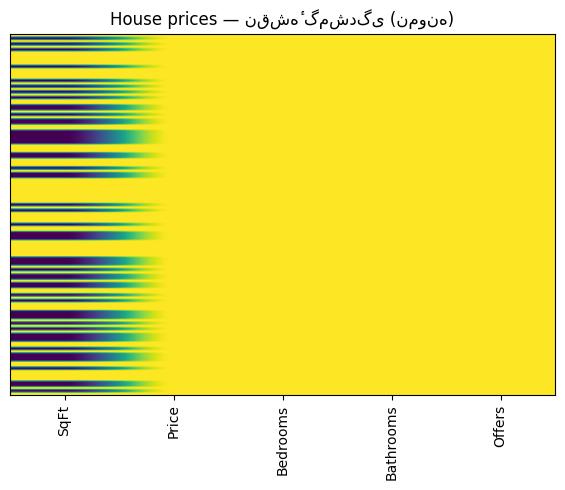

In [14]:
dfh0 = df_house.copy()
col = "SqFt"
dfh_mcar = inject_mcar(dfh0, col=col, missing_rate=0.4, rng=np.random.default_rng(10))

print("میانگین اصلی:", float(dfh0[col].mean()))
print("میانگین complete-case (MCAR):", float(dfh_mcar[col].dropna().mean()))

plot_missingness_map(dfh_mcar[[col, "Price", "Bedrooms", "Bathrooms", "Offers"]], title="House prices — نقشهٔ گمشدگی (نمونه)")
